In [15]:
! pip install missingno

In [16]:
#import files
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
# read csv file
df=pd.read_csv('fatal-police-shootings-data.csv')

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
id                         5416 non-null int64
name                       5416 non-null object
date                       5416 non-null object
manner_of_death            5416 non-null object
armed                      5189 non-null object
age                        5181 non-null float64
gender                     5414 non-null object
race                       4895 non-null object
city                       5416 non-null object
state                      5416 non-null object
signs_of_mental_illness    5416 non-null bool
threat_level               5416 non-null object
flee                       5167 non-null object
body_camera                5416 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 518.5+ KB


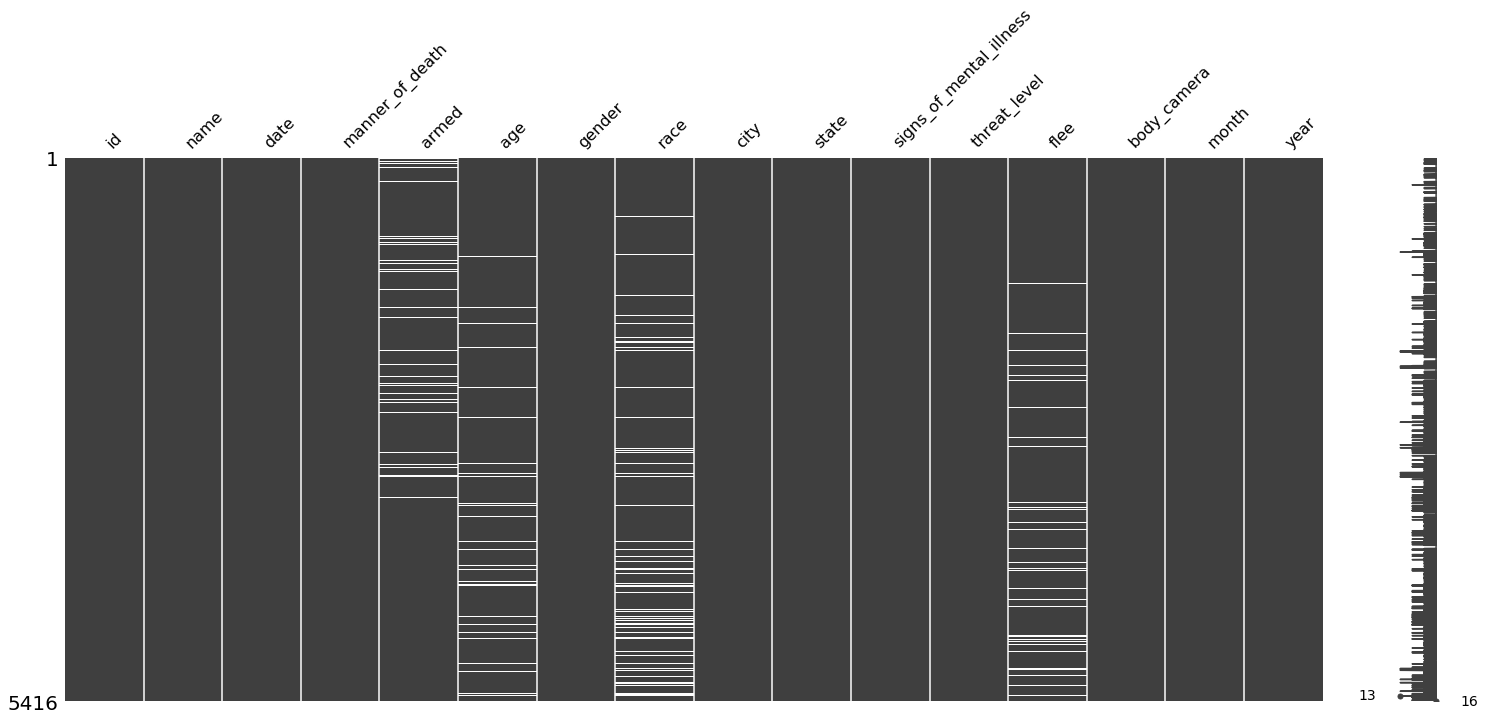

In [18]:
msno.matrix(df)

In [12]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'month', 'year'],
      dtype='object')

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
df['month']=df['date'].apply([lambda x:x.month])

df['year']=df['date'].apply([lambda x: x.year])

In [10]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,2015


In [56]:
month_year=df.groupby(by=['month','year']).count()[['manner_of_death','threat_level']].unstack()

In [57]:
month_year.head()

manner_of_death                                  threat_level        \
year             2015  2016   2017   2018  2019   2020         2015  2016   
month                                                                       
1                76.0  81.0   92.0   99.0  94.0   89.0         76.0  81.0   
2                77.0  86.0  100.0   80.0  72.0   80.0         77.0  86.0   
3                92.0  92.0   76.0  109.0  88.0   94.0         92.0  92.0   
4                84.0  73.0   67.0   98.0  71.0   77.0         84.0  73.0   
5                71.0  74.0   74.0   83.0  74.0  110.0         71.0  74.0   

                                  
year    2017   2018  2019   2020  
month                             
1       92.0   99.0  94.0   89.0  
2      100.0   80.0  72.0   80.0  
3       76.0  109.0  88.0   94.0  
4       67.0   98.0  71.0   77.0  
5       74.0   83.0  74.0  110.0

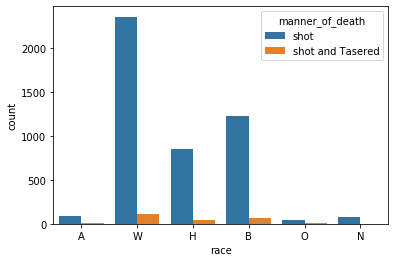

In [64]:
sns.countplot(x='race',
    
    hue='manner_of_death',
    data=df)

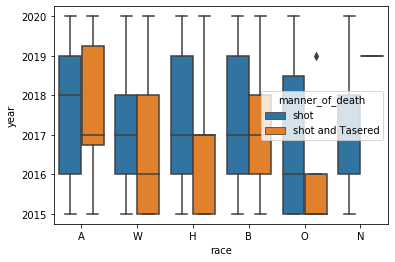

In [62]:
sns.boxplot(x='race',
    y='year',
    hue='manner_of_death',
    data=df)

In [22]:
df_state=df['state'].value_counts()[:10]